<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
# Import libraries

# Import libraries

import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn import metrics  
from sklearn.metrics import classification_report

# Regression Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

# Classifer Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# To visualize individual decision trees
from sklearn import tree
from sklearn.tree import export_text

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data in pandas

df = pd.read_csv('transfusion.data')

# Check data has loaded correctly

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
# Perform EDA by investigating each of the points above 
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
df.nunique()

Recency (months)                              31
Frequency (times)                             33
Monetary (c.c. blood)                         33
Time (months)                                 78
whether he/she donated blood in March 2007     2
dtype: int64

In [6]:
df.rename(columns={'Recency (months)': 'Last_Donation', 'Frequency (times)': 'Total_Donation', \
                   'Monetary (c.c. blood)': 'Amount_blood', 'Time (months)': 'First_donation', \
                   'whether he/she donated blood in March 2007': 'Donation_Status'}, inplace=True)

In [7]:
df.columns

Index(['Last_Donation', 'Total_Donation', 'Amount_blood', 'First_donation',
       'Donation_Status'],
      dtype='object')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [8]:
# Filter/subset/clean the data according to your EDA findings
X = df.drop('Donation_Status', axis=1)
y = df['Donation_Status']

In [9]:
correlations = df.corr()
pd.DataFrame(correlations['Donation_Status']).sort_values(by='Donation_Status', ascending=False)

,Donation_Status
Donation_Status,1.000000
Total_Donation,0.218633
Amount_blood,0.218633
First_donation,-0.035854
Last_Donation,-0.279869


In [10]:
y.value_counts()

0    570
1    178
Name: Donation_Status, dtype: int64

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [11]:
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (523, 4)
Number transactions y_train dataset:  (523,)
Number transactions X_test dataset:  (225, 4)
Number transactions y_test dataset:  (225,)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [13]:
# Choose a model or models
reg = RandomForestRegressor(n_estimators=100, random_state = 0)

# Step 9: Fit the Model

In [14]:
# Fit model
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [15]:
# Evaluate model against training set

acc_score = reg.score(X_test, y_test)
print(acc_score)

-0.013864323009306734


In [16]:
# Predicted value

y_pred = reg.predict(X_test)
print(y_pred)

[0.5225     0.67       0.738      0.92       0.4        0.51193651
 0.         0.51193651 0.         0.63       0.1        0.11333333
 0.24832058 0.39       0.22       0.11066667 0.60833333 0.06998608
 0.01       0.51       0.         0.01425397 0.09294708 0.20987855
 0.27       0.052      0.24832058 0.97       0.14       0.
 0.57       0.06       0.02       0.1        0.63       0.20987855
 0.         0.12       0.55633333 0.         0.01425397 0.47
 0.20987855 0.29       0.01       0.03       0.13       0.23670635
 0.68       0.02       0.         0.06       0.04985714 0.09294708
 0.035      0.71       0.26       0.37       0.2675     0.23670635
 0.01       0.24832058 0.87       0.37       0.20987855 0.20987855
 0.23670635 0.23670635 0.08       0.26       0.08       0.
 0.24832058 0.38       0.12       0.20987855 0.51655952 0.20352778
 0.66       0.77       0.738      0.         0.10166667 0.41
 0.33754762 0.87       0.20987855 0.87       0.01       0.03
 0.11       0.17       0.86  

In [33]:
# For Bagged Tree Model

btc = BaggingClassifier(n_estimators=100, 
                        random_state = 1)

btc.fit(X_train, y_train)


BaggingClassifier(n_estimators=100, random_state=1)

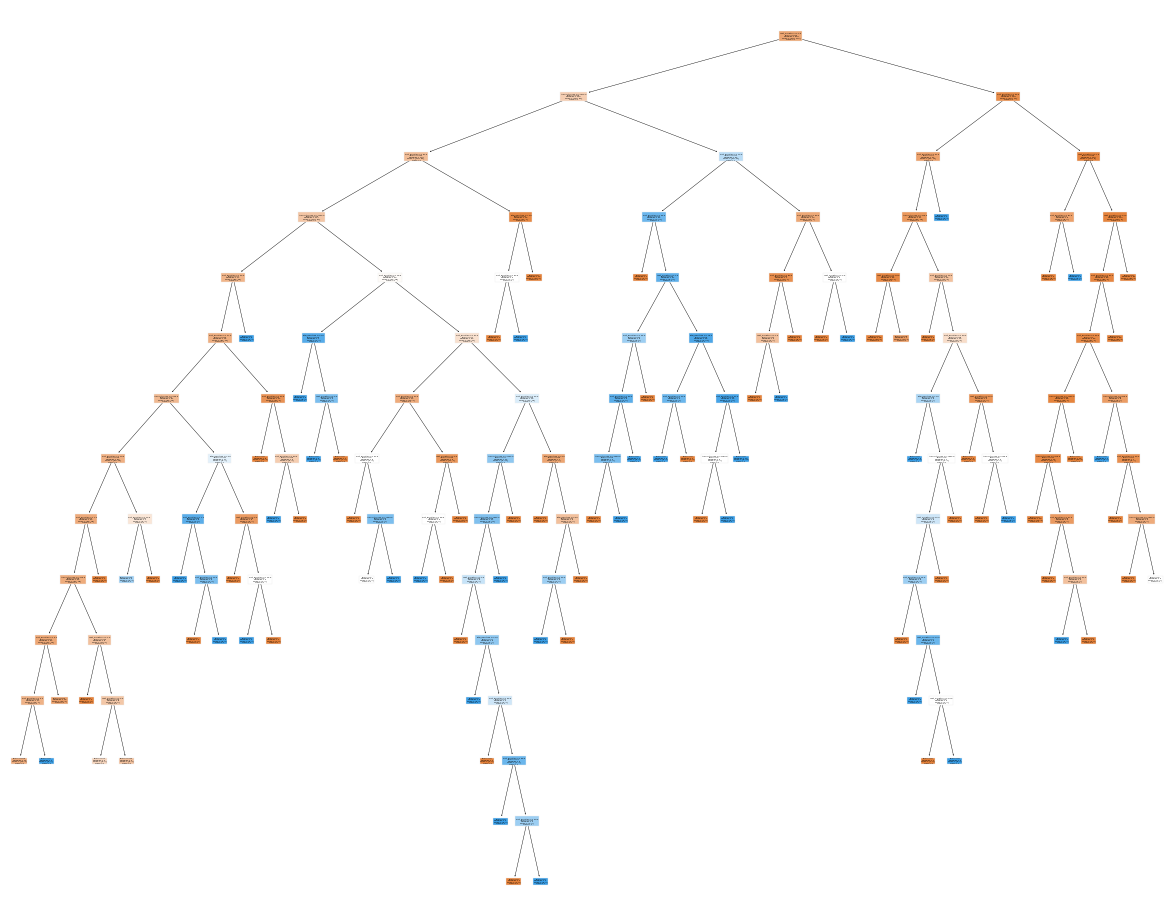

In [45]:
# Get the first decision tree for bagged tree model
fig, axes = plt.subplots(figsize = (25,20), dpi=60)
tree.plot_tree(btc.estimators_[0],
               feature_names = X.columns, 
               class_names=['0','1'],
               filled = True);

In [35]:
# Fit Random Forest Model

rfc = RandomForestClassifier(n_estimators=100, random_state = 1)

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

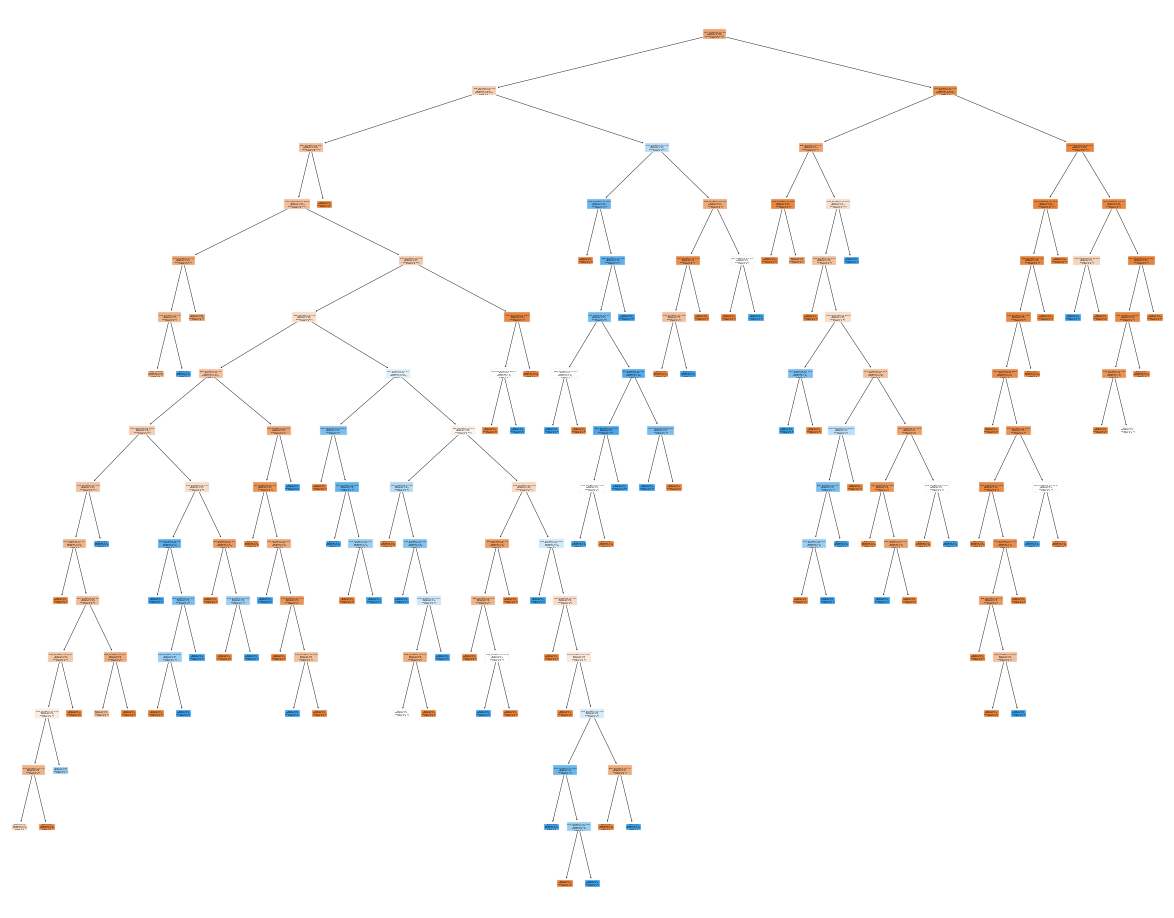

In [46]:
# Get the first decision tree for random tree model
fig, axes = plt.subplots(figsize = (25,20), dpi=60)
tree.plot_tree(rfc.estimators_[0],
               feature_names = X.columns, 
               class_names=['0','1'],
               filled = True);

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [37]:
# Evaluate model against test set

In [38]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [39]:
importances

,feature,importance
3,First_donation,0.432
0,Last_Donation,0.291
2,Amount_blood,0.142
1,Total_Donation,0.136


In [40]:
# Generate the prediction values for each of the test observations using predict_proba() function 
preds_rtc = btc.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

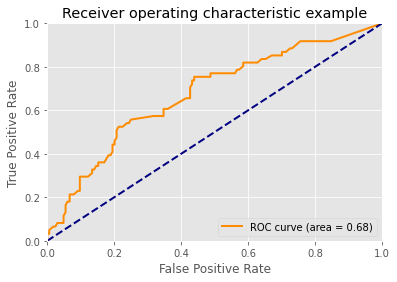

In [41]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [42]:
# Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_test, y_pred)

0.011037163158400682

In [43]:
# Homogeneity
from sklearn.metrics import homogeneity_score 
homogeneity_score(y_test, y_pred)

0.5453521148319789

In [44]:
# V-measure
from sklearn.metrics import v_measure_score
metrics.v_measure_score(y_test, y_pred)

0.13440438732605092

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



